In [ ]:
import math
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def benford_distribution():
    """
    Calculates the theoretical distribution according to Benford's Law.

    Returns
    -------
    list of float
        A list containing the theoretical probabilities of the first digit being 1 through 9.
    """
    return [math.log10(1 + 1 / d) for d in range(1, 10)]


def load_counter_from_csv(filename):
    """
    Reads a CSV file and creates a Counter object.

    Parameters
    ----------
    filename : str
        The name of the CSV file to read.

    Returns
    -------
    collections.Counter
        A Counter object containing the frequency of each digit.
    """
    df = pd.read_csv(filename)
    return Counter(dict(zip(df["Digit"], df["Frequency"])))


def calculate_mae(actual, theoretical):
    """
    Calculates the Mean Absolute Error (MAE) between actual and theoretical values.

    Parameters
    ----------
    actual : list of float
        The actual values to compare.
    theoretical : list of float
        The theoretical values to compare.

    Returns
    -------
    float
        The Mean Absolute Error (MAE) between the actual and theoretical values.
    """
    print(np.array(actual) - np.array(theoretical))
    return np.mean(np.abs(np.array(actual) - np.array(theoretical)))

### model_dict Explanation

- key: The path to the model
- value: ['{The official name of the model}', '{The number of CSV files containing the results}']

The path format for the CSV files with the results is assumed to be: `/{model_name}/result_{i}.csv`

In [ ]:
model_dict = {
    "llama_3_1": ["Meta-Llama-3.1-8B-Instruct", 4],
    "gemma": ["gemma-2-9b-it", 4],
    "mistral": ["Mistral-7B-Instruct-v0.2", 3],
    "swallow": ["Swallow-7b-instruct-v0.1", 3],
    "Qwen": ["Qwen2-7B-Instruct", 4],
}

In [ ]:
model_name = "Qwen"

# List of paths to the CSV files
path_list = [
    f"{your_path}/{model_name}/result_{i}.csv"
    for i in range(1, model_dict[model_name][1])
]

# Aggregate all Counter data
aggregated_counter = Counter()
for path in path_list:
    counter = load_counter_from_csv(path)
    aggregated_counter.update(counter)

0.05038938960488752 0.04575749056067514
0.05244979709488072 0.05115252244738129
0.05716431848337835 0.05799194697768673
0.059096218089033446 0.06694678963061322
0.0625094481745038 0.07918124604762482
0.06868352382758997 0.09691001300805642
0.09666686627297921 0.12493873660829992
0.1804588148041609 0.17609125905568124
0.37258162364858605 0.3010299956639812


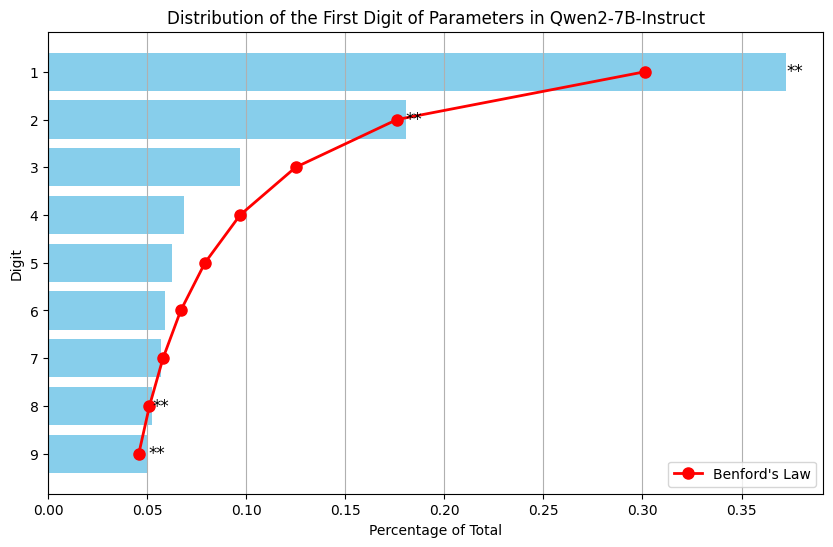

[ 0.0046319   0.00129727 -0.00082763 -0.00785057 -0.0166718  -0.02822649
 -0.02827187  0.00436756  0.07155163]
Mean Absolute Error (MAE): 0.0182


In [ ]:
# Data formatting
digits = list(range(1, 10))[::-1]
frequencies = [aggregated_counter.get(d, 0) for d in digits]
ratio = [item / sum(frequencies) for item in frequencies]
benford_law = benford_distribution()[::-1]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(digits, ratio, color="skyblue")

# Invert the Y-axis order
plt.gca().invert_yaxis()

# Set all digits on the Y-axis ticks
plt.yticks(digits)
plt.plot(
    benford_law,
    digits,
    color="red",
    marker="o",
    linestyle="-",
    linewidth=2,
    markersize=8,
    label="Benford's Law",
)

# Add '*' to the end of bars that exceed the theoretical values
for i, (freq, benford) in enumerate(zip(ratio, benford_law)):
    print(freq, benford)
    if freq > benford:
        plt.text(
            freq, digits[i], "**", ha="left", va="center", color="black", fontsize=12
        )

# Set axis labels and title
plt.xlabel("Percentage of Total")
plt.ylabel("Digit")
plt.title(
    f"Distribution of the First Digit of Parameters in {model_dict[model_name][0]}"
)
plt.grid(axis="x")

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate MAE
mae = calculate_mae(ratio, benford_law)

print(f"Mean Absolute Error (MAE): {mae:.4f}")